In [1]:
import matplotlib
from matplotlib import transforms, patches, pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import seaborn as sns

In [2]:
# inline matplotlib plots
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# define colors
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE_GREEN = '#31859D'
BLUE_GREEN_LIGHT ='#92CDDD'
BLUE_DARK = '#1E497D'
BLUE_LIGHT = '#95B3D7'
ORANGE_LIGHT = '#FBC08F'
RED3 = '#DE3A2F'

In [4]:
def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

def print_colors(colors):
    rgb_colors = list(map(hex_to_rgb, colors))
    sns.palplot(rgb_colors)

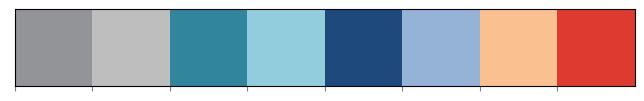

In [5]:
print_colors([
        GRAY7,
        GRAY9,
        BLUE_GREEN,
        BLUE_GREEN_LIGHT,
        BLUE_DARK,
        BLUE_LIGHT,
        ORANGE_LIGHT,
        RED3
        ])

In [6]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [7]:
# Returns the x coordinates of a text element on a given axis of a given
# figure.
# Used to position elements on the canvas
# Returns object with attributes:
#   x0 coordinate of the text element
#   x1 coordinate of the text element
#   y0 coordinate of the text element
#   y1 coordinate of the text element
def get_text_coordinates(text_element, ax, fig):
        x0 = text_element.get_window_extent(fig.canvas.get_renderer()).x0
        x1 = text_element.get_window_extent(fig.canvas.get_renderer()).x1
        y0 = text_element.get_window_extent(fig.canvas.get_renderer()).y0
        y1 = text_element.get_window_extent(fig.canvas.get_renderer()).y1
        return {
                 'x0': round(ax.transData.inverted().transform_point((x0, 0))[0], 2),
                 'x1': round(ax.transData.inverted().transform_point((x1, 0))[0], 2),
                 'y0': round(ax.transData.inverted().transform_point((0, y0))[1], 2),
                 'y1': round(ax.transData.inverted().transform_point((0, y1))[1], 2)
               }

In [8]:
# A to O
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K' ,'L', 'M', 'N', 'O']
feature_labels = [f'Feature {x}' for x in features]

In [9]:
X_values = [
        [0, 1, 1, 11, 40, 47],   # A
        [0, 2, 2, 13, 36, 47],   # B
        [2, 2, 5, 24, 34, 33],   # C
        [8, 1, 4, 21, 37, 29],   # D
        [6, 1, 6, 23, 36, 28],   # E
        [14, 1, 5, 20, 35, 25],  # F
        [19, 2, 5, 15, 26, 33],  # G
        [13, 1, 6, 23, 32, 25],  # H
        [22, 2, 5, 17, 27, 27],  # I
        [2, 8, 14, 24, 27, 25],  # J
        [29, 1, 4, 17, 28, 21],  # K
        [29, 1, 4, 23, 27, 16],  # L
        [33, 3, 8, 25, 18, 13],  # M
        [26, 9, 14, 24, 17, 10], # N
        [51, 1, 6, 15, 16, 11]   # O
        ]

In [10]:
colors = [
        ([GRAY9] + [GRAY8]*3 + [BLUE_DARK]*2),   # A
        ([GRAY9] + [GRAY8]*3 + [BLUE_DARK]*2),   # B
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # C
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # D
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # E
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # F
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # G
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # H
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # I
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # J
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # K
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # L
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # M
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2),  # N
        ([GRAY9] + [GRAY8]*3 + [BLUE_LIGHT]*2)   # 0
        ]

colors

[['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#1E497D', '#1E497D'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#1E497D', '#1E497D'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5', '#A6A6A5', '#95B3D7', '#95B3D7'],
 ['#BFBEBE', '#A6A6A5', '#A6A6A5',

In [11]:
feature_labels

['Feature A',
 'Feature B',
 'Feature C',
 'Feature D',
 'Feature E',
 'Feature F',
 'Feature G',
 'Feature H',
 'Feature I',
 'Feature J',
 'Feature K',
 'Feature L',
 'Feature M',
 'Feature N',
 'Feature O']

In [12]:
X_values_reversed_transposed = np.array(X_values[::-1]).T.tolist()
colors_reversed_transposed = np.array(colors[::-1]).T.tolist()
feature_labels_reversed = feature_labels[::-1]

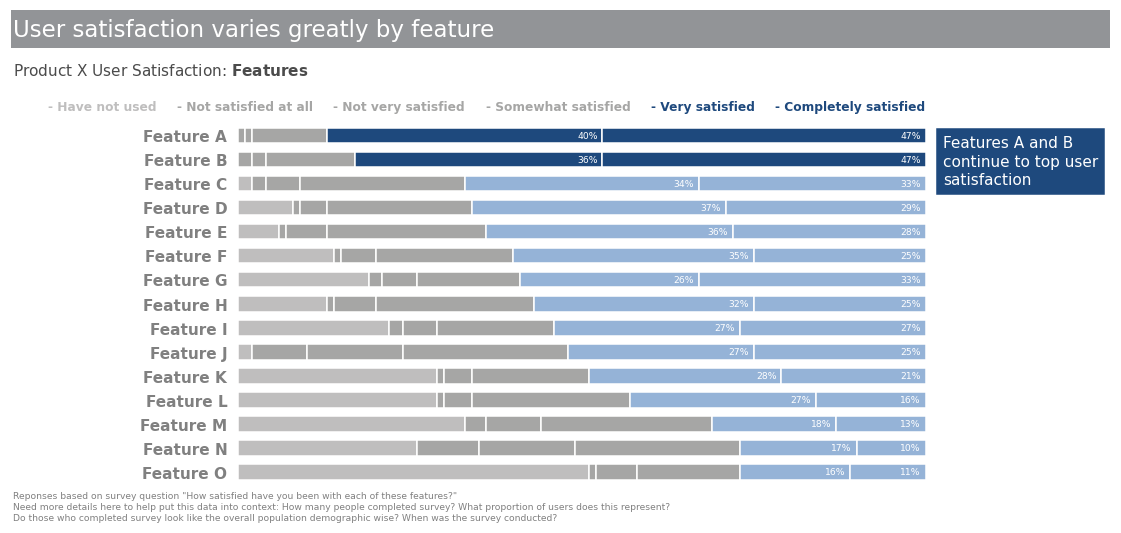

In [14]:
# create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(25, 7),  # width, height in inches
                          dpi=110)       # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

widths = np.cumsum(X_values, axis=1)[::-1].T.tolist()

for i, (colname, color) in enumerate(zip(X_values_reversed_transposed, colors_reversed_transposed)):
    bars = ax.barh(feature_labels_reversed,
             colname,
             color=color,
             edgecolor='white',
             height=0.65,
             left=np.sum(X_values_reversed_transposed[:i], axis=0))


    for j, b in enumerate(bars):
            # 3% is too small to display the label
            if b.get_width() <= 3:
                continue

            # We could annotate all values, but only need to draw attention
            # to these specific ones
            if color[j] not in [BLUE_DARK, BLUE_LIGHT]:
                continue

            width = widths[i][j]

            plt.text(width - 0.7, b.get_y() + b.get_height() / 2,
                     f'{b.get_width():.0f}%',
                     ha='right',
                     va='center',
                     fontsize=6,
                     color='white')

# set y ticks and labels
ax.set_yticks(range(len(feature_labels_reversed)))
ax.set_yticklabels(feature_labels_reversed, fontsize=10, fontweight='bold')

# set x axis limits
ax.set_xlim(0, 100)

# set x ticks and labels
ax.set_xticks([0, 25, 50, 75, 100])

ax.tick_params(top=False, bottom=False, left=False, labelbottom=False, labeltop=False)
ax.tick_params(color=GRAY8)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Legend
legends_end_x1 = 100

legend_texts = [
    '- Have not used',
    '- Not satisfied at all',
    '- Not very satisfied',
    '- Somewhat satisfied',
    '- Very satisfied',
    '- Completely satisfied',
]

legend_fontsize = 8

# Drawing the elements to get their size with respect to coordinates to
# calculate the starting position given the end position and the desired spacing
legends_length = 0
for text in legend_texts:
    element = ax.text(0, 0, text, fontsize=legend_fontsize, fontweight='bold')
    legends_length += get_text_coordinates(element, ax=ax, fig=fig)['x1']
    element.set_visible(False)

spacing = 3

legends_start_x0 = legends_end_x1 - legends_length - spacing * (len(legend_texts) - 1)

legends_y = len(feature_labels_reversed) + 0.05

legend_colors = [GRAY9] + [GRAY8] * 3 + [BLUE_DARK] * 2

x = legends_start_x0

for text, color in zip(legend_texts, legend_colors):
    previous_element = ax.text(x, legends_y, text, fontsize=legend_fontsize, color=color, fontweight='bold')
    x = get_text_coordinates(previous_element, ax=ax, fig=fig)['x1'] + spacing

title_x0 = legends_start_x0 - 5

# Calculate spacing dynamically
side_box_text_1 = 'Features A and B\ncontinue to top user\nsatisfaction'
side_box_text_2 = 'Users are least\nsatisfied with\nFeatures J and N;\nwhat improvements\n' \
                        'can we make here\nfor a better user\nexperience?'

# In the following text, I added two spaces to match the size of the above boxes.
# Should be fixed by using a monospace font
side_box_text_3 = 'Feature O is least\nused. What steps\n' \
                        'can we proactively  \n' \
                        'take with existing\n' \
                        'users to increase\n' \
                        'utilization?'

linespacing = 1.3
fontsize = 10


side_boxes_height = 0
__el = ax.text(0, 0, side_box_text_1, fontsize=fontsize, linespacing=linespacing)
side_boxes_height += get_text_coordinates(__el, ax=ax, fig=fig)['y1']
__el.set_visible(False)

__el = ax.text(0, 0, side_box_text_2, fontsize=fontsize, linespacing=linespacing)
side_boxes_height += get_text_coordinates(__el, ax=ax, fig=fig)['y1']
__el.set_visible(False)

__el = ax.text(0, 0, side_box_text_3, fontsize=fontsize, linespacing=linespacing)
side_boxes_height += get_text_coordinates(__el, ax=ax, fig=fig)['y1']
__el.set_visible(False)


side_boxes_start_y0 = 0.07 # to handle the padding from the background color
side_boxes_end_y1 = len(feature_labels_reversed) - 1

spacing = (side_boxes_end_y1 - side_boxes_start_y0 - side_boxes_height) / (3 - 1) # n_elements - 1

side_box_x = 102.5

y1 = get_text_coordinates(previous_element, ax=ax, fig=fig)['y1'] + spacing

text_bottom = ax.text(side_box_x, side_boxes_start_y0, side_box_text_3,
        fontsize=fontsize, linespacing=linespacing, backgroundcolor=BLUE_GREEN,
        color='white')

y1 = get_text_coordinates(text_bottom, ax=ax, fig=fig)['y1'] + spacing

text_middle = ax.text(side_box_x, y1, side_box_text_2,
        fontsize=fontsize, linespacing=linespacing, backgroundcolor=RED3,
        color='white')

y1 = get_text_coordinates(text_middle, ax=ax, fig=fig)['y1'] + spacing

previous_element = ax.text(side_box_x, y1, side_box_text_1,
        fontsize=fontsize, linespacing=linespacing, backgroundcolor=BLUE_DARK,
        color='white')


rightmost_x = get_text_coordinates(previous_element, ax=ax, fig=fig)['x1']

text_bottom.set_visible(False)
text_middle.set_visible(False)


title = ax.text(title_x0, len(feature_labels_reversed) + 3.15,
        'User satisfaction varies greatly by feature',
        fontsize=15, backgroundcolor='none', color='white',
        ha='left')

title_coordinates =  get_text_coordinates(title, ax=ax, fig=fig)

# I cannot use background color with the title, because it does not extend up to
# the rightmost x coordinate.
# I could not do this with a bbox config.
# I could not use a rectangle directly because it is not being drawn out of the
# ax x/y limits.
# I create another axis, ax2, and I create a rectangle there.
title_x1 = title_coordinates['x1']
title_y0 = title_coordinates['y0']
title_y1 = title_coordinates['y1']

height = title_y1 - title_y0
width = rightmost_x - title_x0

padding = 0.65 # space around the text

padding_coord = (height / 2 * padding)

ax2_x_min = title_x0 - padding_coord
ax2_y_min = title_y0 - padding_coord
ax2_y_max = title_y1 + padding_coord

ax2_height = ax2_y_max - ax2_y_min

tweak_coords = 1.45 # extend the box a bit to align with background color of side texts

ax2_width = width + 2 * padding_coord + tweak_coords
ax2 = ax.inset_axes([ax2_x_min, ax2_y_min, ax2_width, ax2_height], transform=ax.transData, zorder=1)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

ax2_x_max = ax2.get_xlim()[1]

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

rect = patches.Rectangle((0, 0), ax2_x_max, ax2_y_max, linewidth=1, edgecolor=GRAY7, facecolor=GRAY7)
ax2.add_patch(rect)

# subtitle
ax.text(title_x0, len(feature_labels_reversed) + 1.50,
        'Product X User Satisfaction: '
        '$\\bf{Features}$',
        fontsize=10,
        color='#4B4B4B')

# footnote
ax.text(title_x0, -2,
        'Reponses based on survey question "How satisfied have you been with each'
        ' of these features?"\n'
        'Need more details here to help put this data into context: How many'
        ' people completed survey? What proportion of users does this represent?\n'
        'Do those who completed survey look like the overall population'
        ' demographic wise? When was the survey conducted?',
        fontsize=6, linespacing=1.3)

plt.show()